통계적으로 회귀모델을 구축하는 것과, 머신러닝적 회귀모델을 구축하는 것이 
조금 다르다. 머신러닝은 결과 ,예측을 어떻게 할거냐, 데이터를 어떻게 보강할 것인가에 초점

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [4]:
data.drop(['Email','Avatar','Address'],axis=1,inplace=True)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


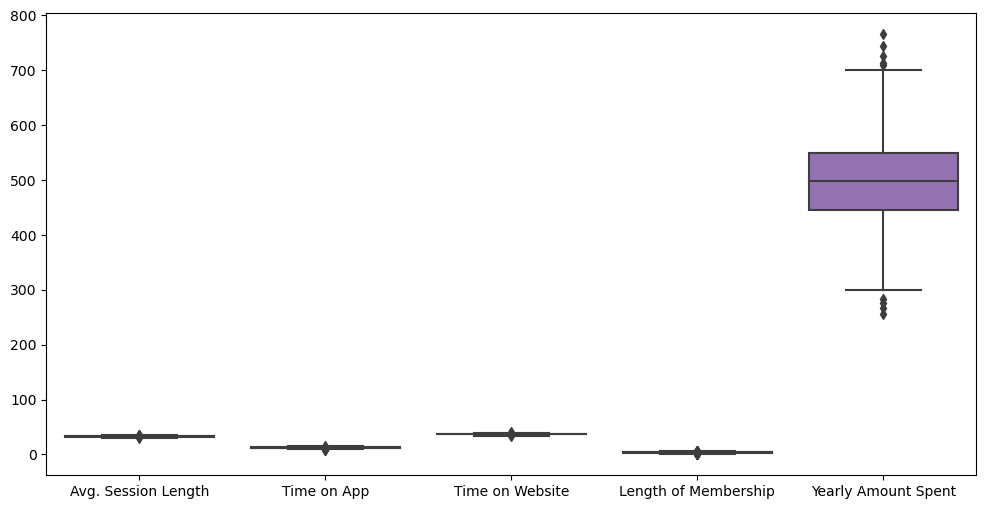

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data);

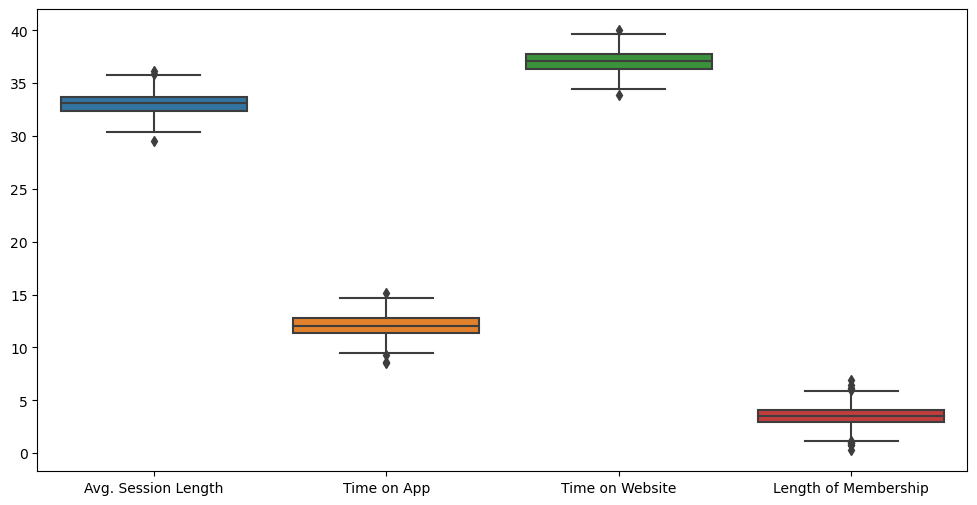

In [9]:
#특정들만 다시 boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=data.iloc[:,:-1]);

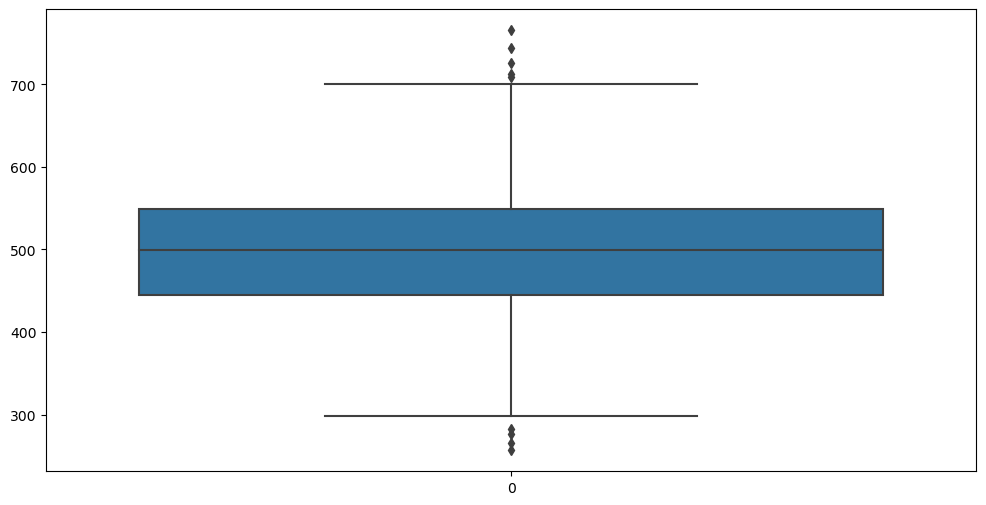

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data['Yearly Amount Spent']);

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

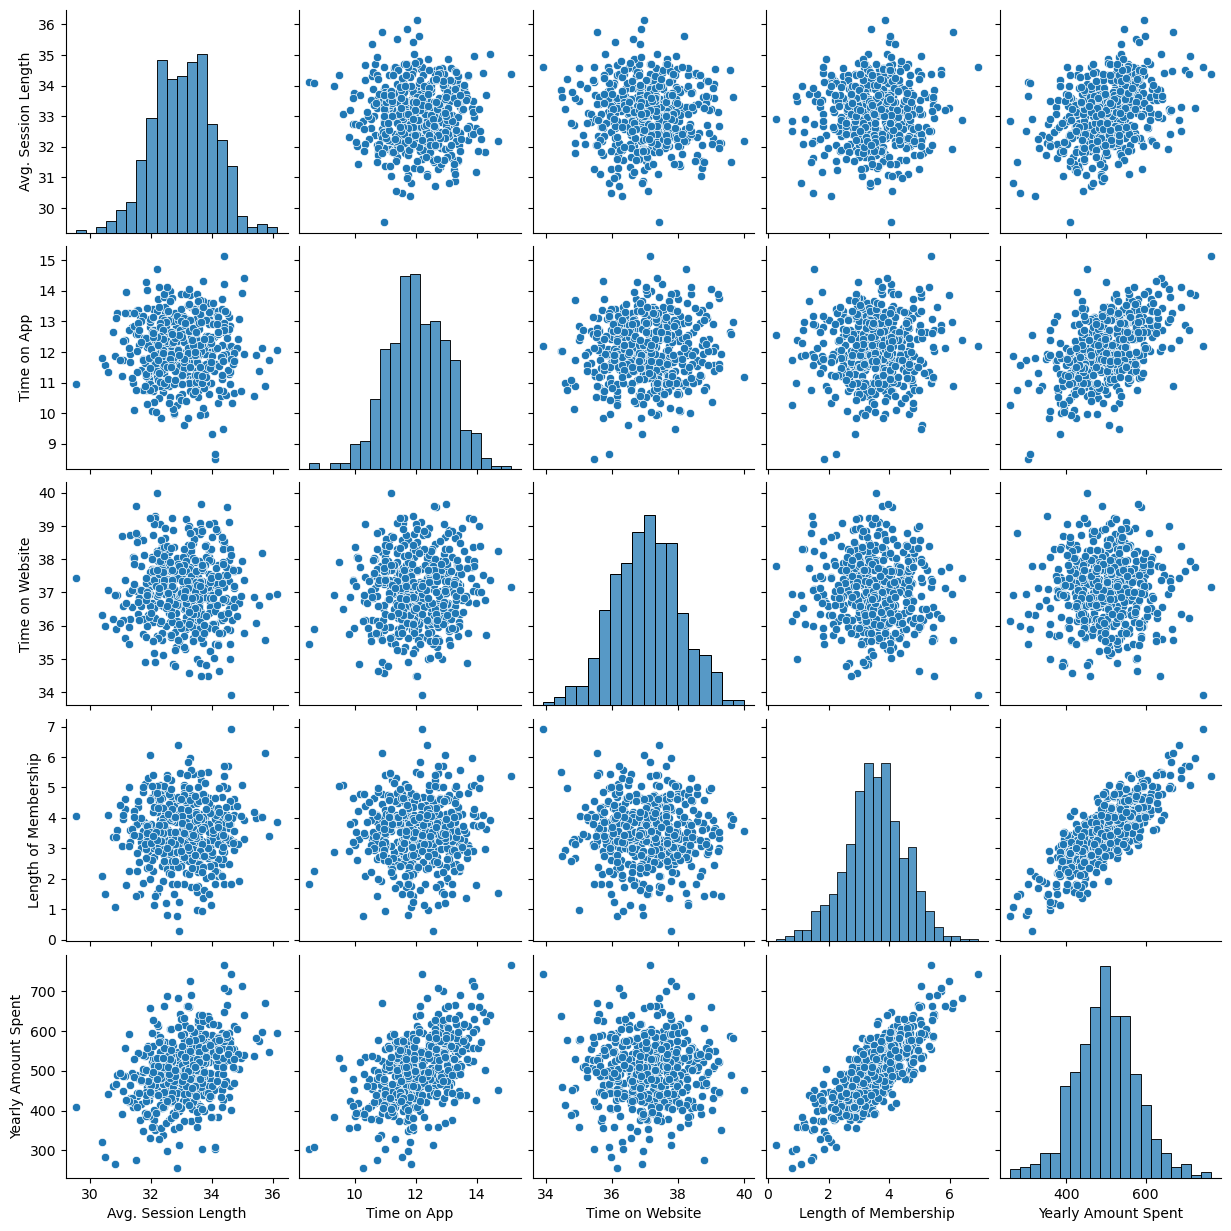

In [11]:
plt.figure(figsize=(12,6))
sns.pairplot(data=data);

큰 상관관계를 보이는 것은 멤버쉽 유지기간

그럼 바로 lmplot

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

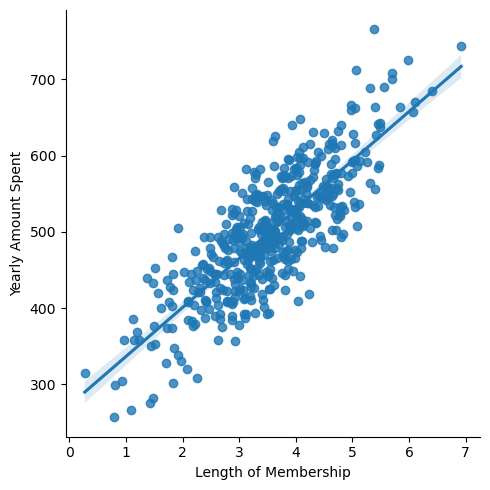

In [12]:
plt.figure(figsize=(12,6))
sns.lmplot(data=data,x='Length of Membership', y='Yearly Amount Spent');

이 속성을 가지고 통계적 회귀

In [13]:
import statsmodels.api as sm
X = data['Length of Membership']
Y = data['Yearly Amount Spent']

lm = sm.OLS(Y,X).fit()

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Fri, 21 Jun 2024   Prob (F-statistic):                        0.00
Time:                         14:10:23   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

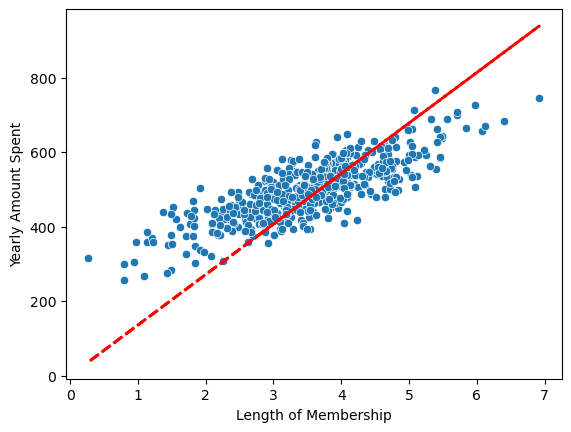

In [18]:
pred = lm.predict(X)

sns.scatterplot(x=X,y=Y)
plt.plot(X,pred,'r',ls='dashed',lw=2);

상수항이 없어서 y절편이 0으로 부터 시작하기 때문에 직선이 실제값과 
어긋나 있다.

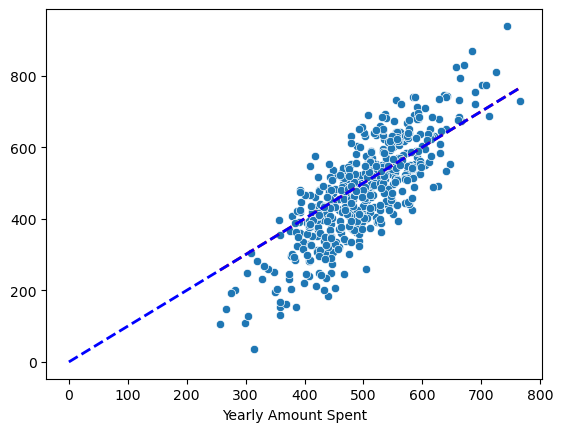

In [23]:
# 실제로 상수항이 있는지 없는지 확인
sns.scatterplot(x=Y,y=pred)
plt.plot([min(Y), max(Y)],[min(Y),max(Y)],'r',ls='dashed',lw=2)
plt.plot([0, max(Y)],[0,max(Y)],'b',ls='dashed',lw=2)
# plt.plot(X,pred,'r',ls='dashed',lw=2);

상수항이 없음.
상수항을 넣어줘야 한다는 것은, 백터 행렬 A에 x옆에 1을 추가해야한다는 뜻

In [24]:
#상수항 넣기
X = np.c_[X, [1]*len(X)]
X

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ],
       [5.4935072 , 1.        ],
       [4.68501725, 1.        ],
       [4.43427343, 1.        ],
       [3.27343358, 1.        ],
       [3.20280607, 1.        ],
       [2.48260777, 1.        ],
       [3.7132092 , 1.        ],
       [4.04642316, 1.        ],
       [3.91854184, 1.        ],
       [2.49454365, 1.        ],
       [3.35784684, 1.        ],
       [3.13613272, 1.        ],
       [2.42080616, 1.        ],
       [1.51657558, 1.        ],
       [4.06454855, 1.        ],
       [4.59993736, 1.        ],
       [1.55915194, 1.        ],
       [2.24514779, 1.        ],
       [3.91930231, 1.        ],
       [5.70515397, 1.        ],
       [2.72173599, 1.        ],
       [4.64819932, 1.        ],
       [2.99636453, 1.        ],
       [3.92348875, 1.        ],
       [4.74257752, 1.        ],
       [3.

다시 모델 fit

In [25]:
lm = sm.OLS(Y,X).fit()

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Fri, 21 Jun 2024   Prob (F-statistic):          4.81e-117
Time:                         14:23:01   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC는 나의 모델이 데이터를 얼마나 훼손시키느냐의 척도. 낮을수록 좋음

***R-Square 값을 너무 믿으면 안됨. 그래프로 봤을때 더 좋은 직선으로
보이는 것이 R값이 낮을 수 있음***

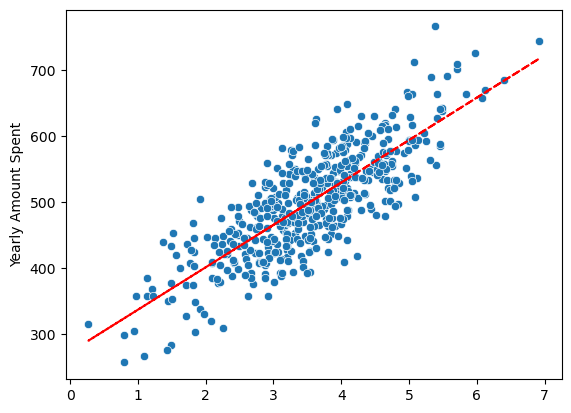

In [31]:
pred = lm.predict(X)

sns.scatterplot(x=X[:,0],y=Y)
plt.plot(X[:,0],pred,'r',ls = 'dashed')

데이터 분리 후 평가

In [32]:
from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent',axis=1)
Y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=13)

In [34]:
#train 데이터로 학습
lm = sm.OLS(y_train,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.884e+04
Date:                 Fri, 21 Jun 2024   Prob (F-statistic):                        0.00
Time:                         14:32:57   Log-Likelihood:                         -1816.5
No. Observations:                  400   AIC:                                      3641.
Df Residuals:                      396   BIC:                                      3657.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     12.0166      0.832     14.440      0.000      10.381      13.653
Time on App             35.2145      1.129     31.197      0.000      32.995      37.434
Time on Website        -14.4797      0.774    -18.715      0.000     -16.001     -12.959
Length of Membership    60.7148      1.151     52.742      0.000      58.452      62.978
==============================================================================
Omnibus:                        0.449   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.571
Skew:                          -0.038   Prob(JB):                        0.752
Kurtosis:                       2.832   Cond. No.                         54.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

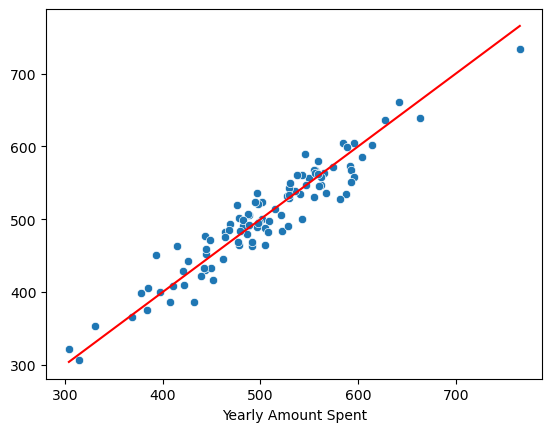

In [35]:
#test 데이터로 확인
pred = lm.predict(X_test)

sns.scatterplot(x=y_test, y=pred) # 참값과 예측값 비교, 직선에 모여있을수록 좋은 모델
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r')